In [4]:
jupyter_settings()   

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# <font color='blue'> Predição de Vendas das Lojas Rossman </font>

## Agenda

1. Contexto
2. Desafio
4. Desenvolvimento da Solução
5. Conclusão
6. Próximos Passos

# <font color='blue'> 1.0 Contexto </font>

- Reunião de Resultados
- CFO requisitou uma previsão de vendas das próximas 6 semanas de cada loja

# <font color='blue'> 2.0 Desafio </font>

# Problema
- Definição do budget para cada loja.

# Causas
- Dificuldade de prever os resultados das loja, apresenta muita divergência.
- Processo de predição de vendas é empirico, baseado em experiências pessoais.
- Não leva em consideração os fatores externos.
- Todo processo de predição é feito manualmente e requere muito esforço humano e tempo.

# Solução
- Utilizar Machine Learning para realizar a Previsão de todas as lojas.
- Automatização do Processo de Previsão. 

# <font color='blue'> 3.0 Desenvolvimento da Solução </font>

In [ ]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

In [149]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


# Estatistica Descritiva

In [156]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.155231,0.0,0.362124,1.904152,1.625796


# Mapa Mental de Hipotéses

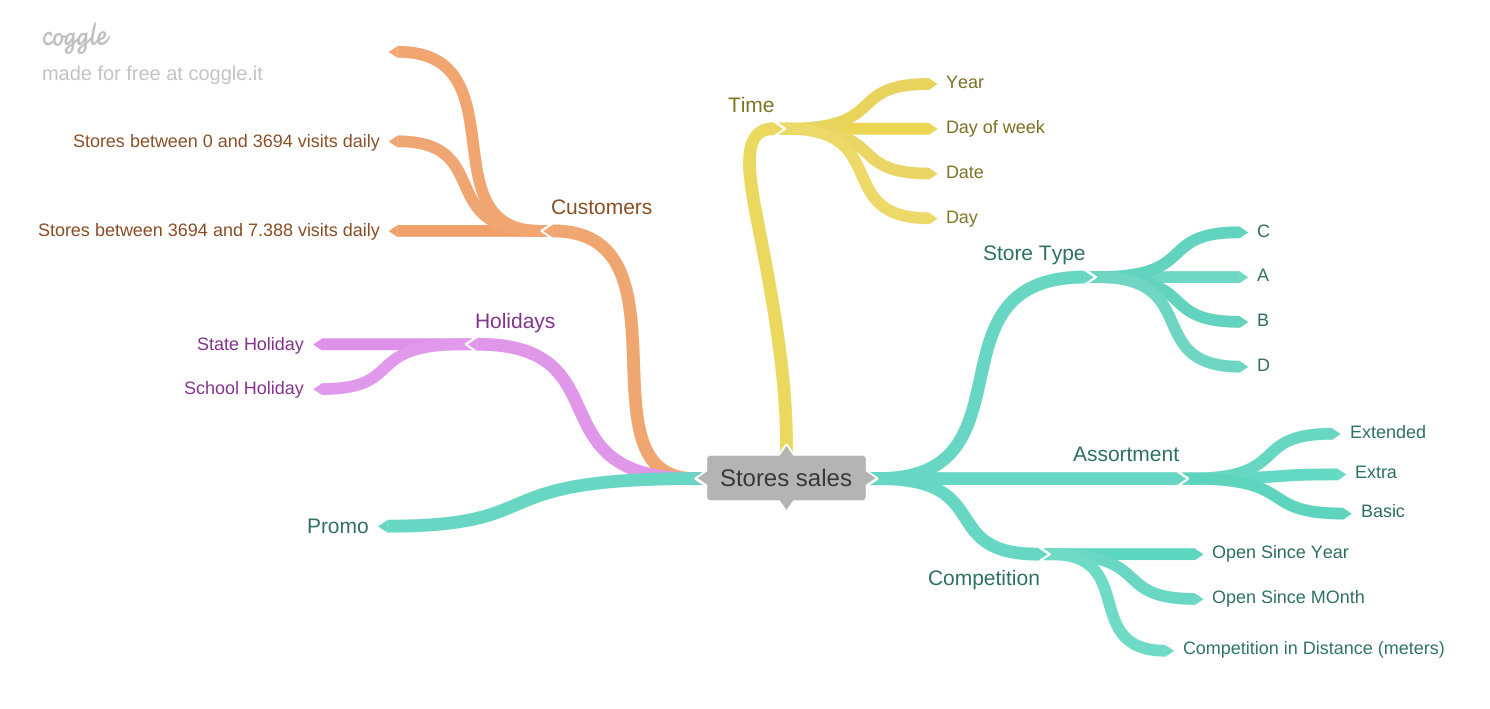

In [33]:
Image('../MindMapHipothesis.png')

# Hipóteses Da Analise Exploratória

**H1** Lojas deveriam vender mais no inicio do ano. 

**H2** Lojas deveriam vender mais na segunda-feira.

**H3** Lojas deveriam vender mais ao longo dos anos.

**H4** Lojas com maior sortimento deveriam vender mais.

**H5** Lojas com competidores próximos deveriam vender menos.

**H6** Lojas com competidores maduros deveriam vender mais.

# ANÁLISE EXPLORATÓRIA DOS DADOS

# Variável Resposta

<AxesSubplot:xlabel='sales'>

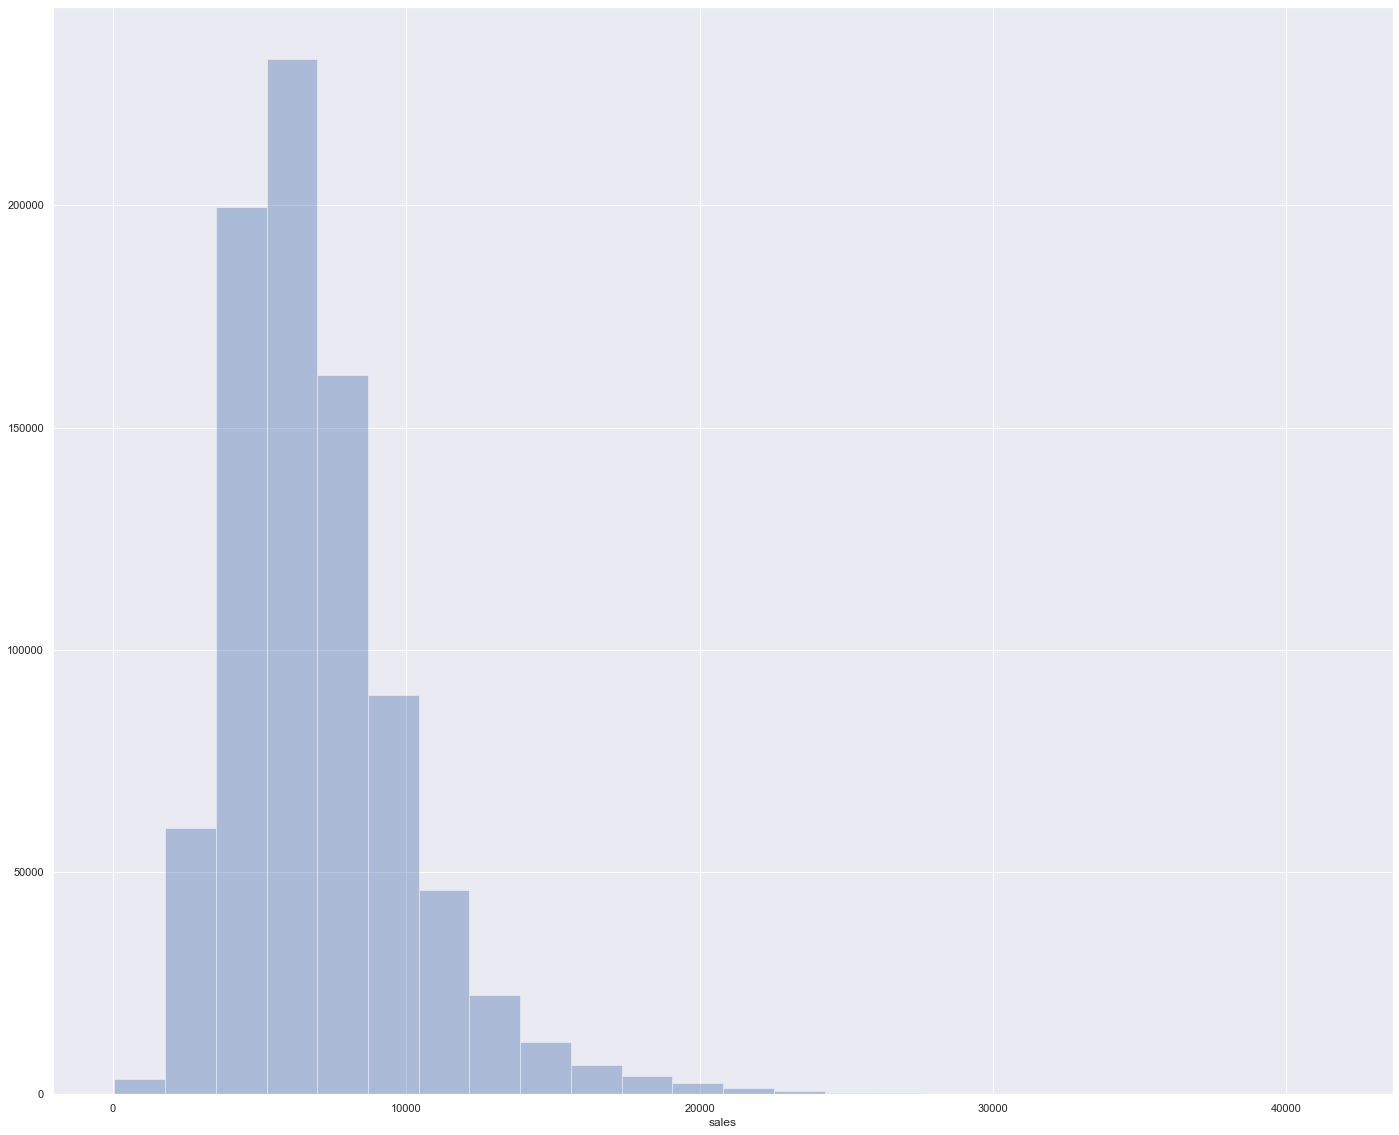

In [299]:
sns.distplot(df4['sales'] , bins=24, kde= False)

# Variavéis Númericas

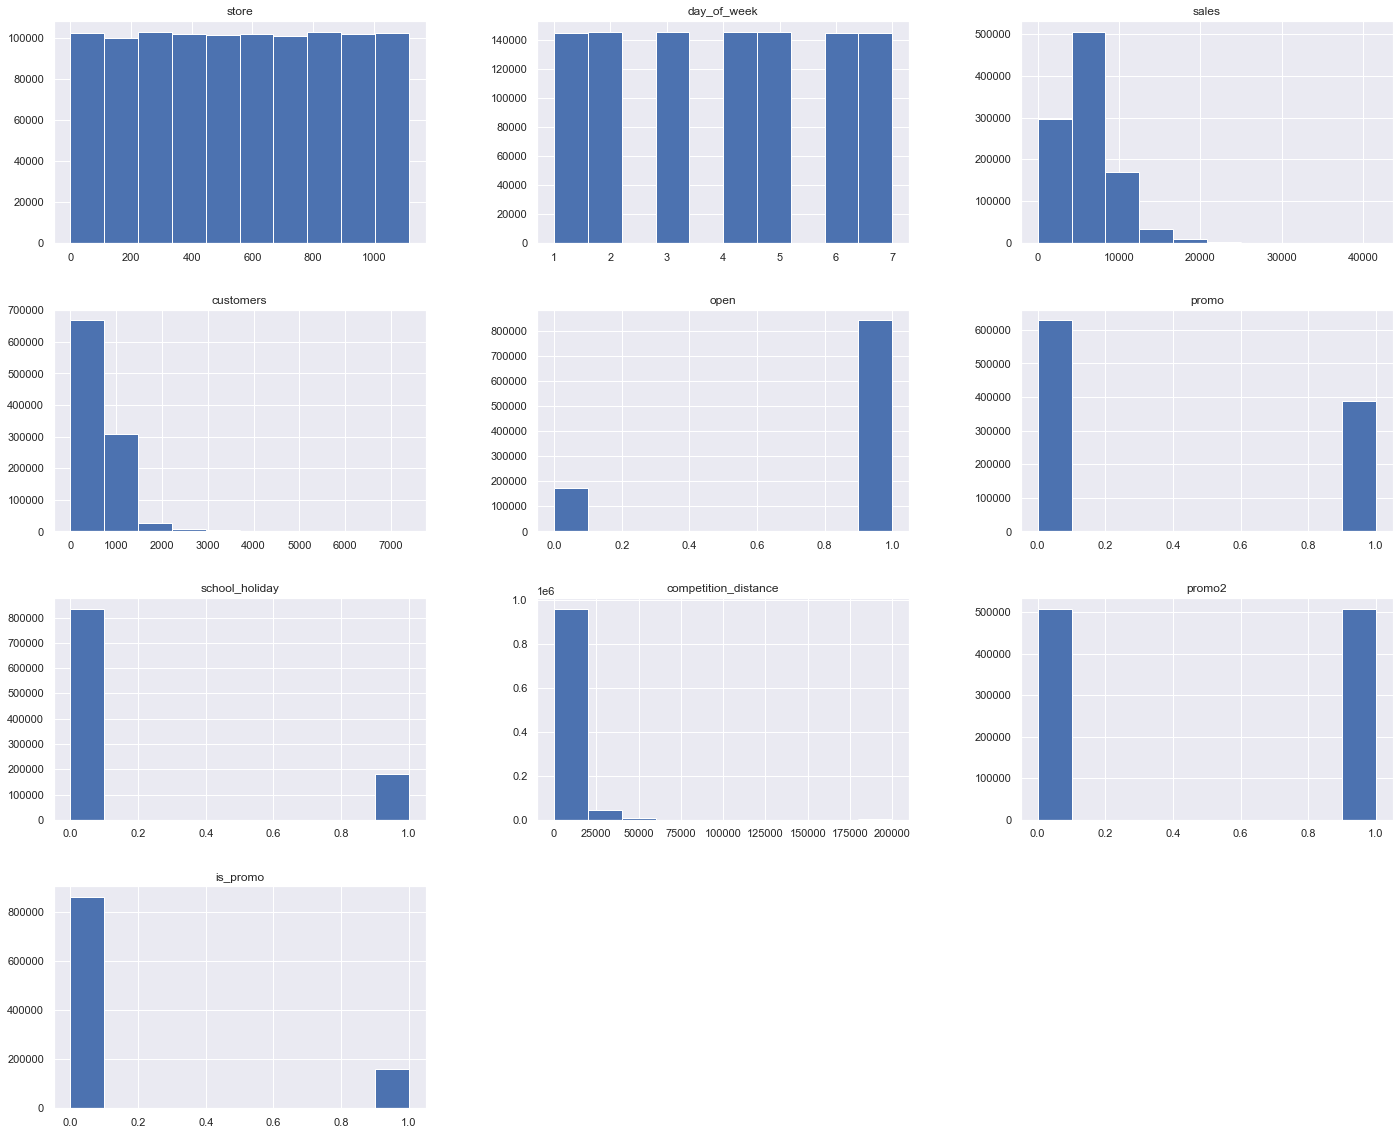

In [300]:
num_attributes.hist();

# Variáveis Categóricas

<AxesSubplot:xlabel='sales', ylabel='Density'>

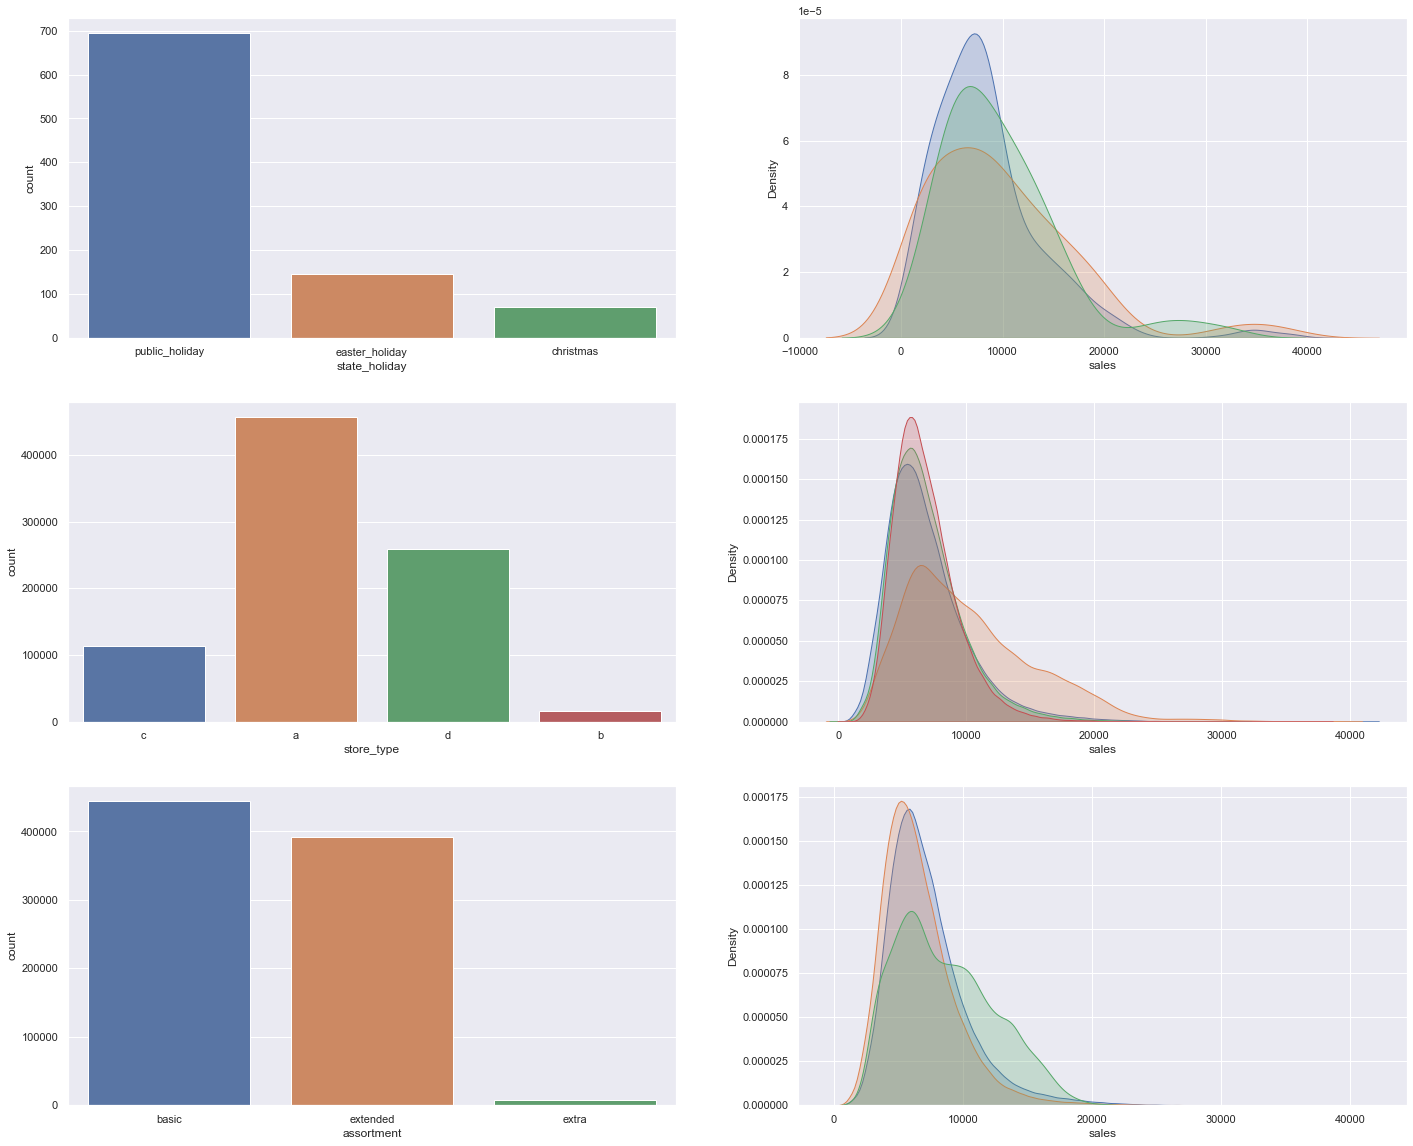

In [301]:
# state_holiday
plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day'] 
sns.countplot( a['state_holiday'] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True )

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'] )

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade=True )

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'] )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True )

# Validação das Hipóteses

## **H1**. Lojas deveriam vender mais no inicio do ano. 
**VERDADEIRA**  Lojas vendem mais no inicio do ano. 

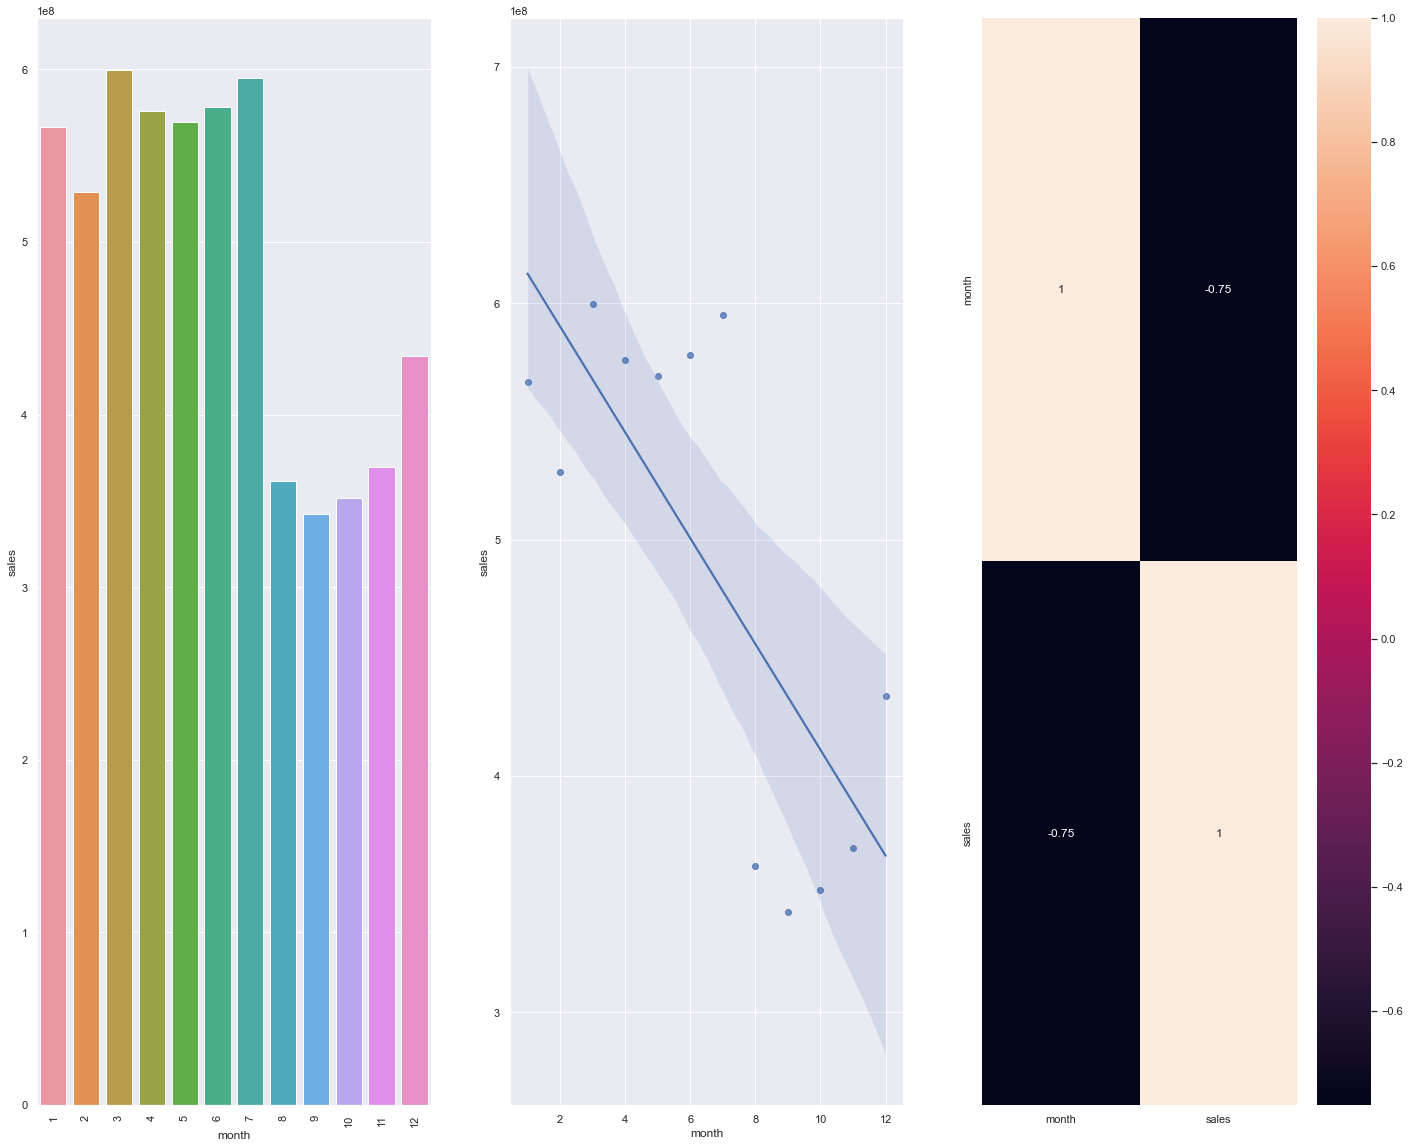

In [302]:
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='month', y='sales', data=aux1 );
xticks(rotation=90)

plt.subplot( 1, 3, 2 )
sns.regplot( x='month', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

## **H2**. Lojas deveriam vender mais na segunda-feira.
**VERDADEIRA** Lojas vendem mais na segunda-feira.

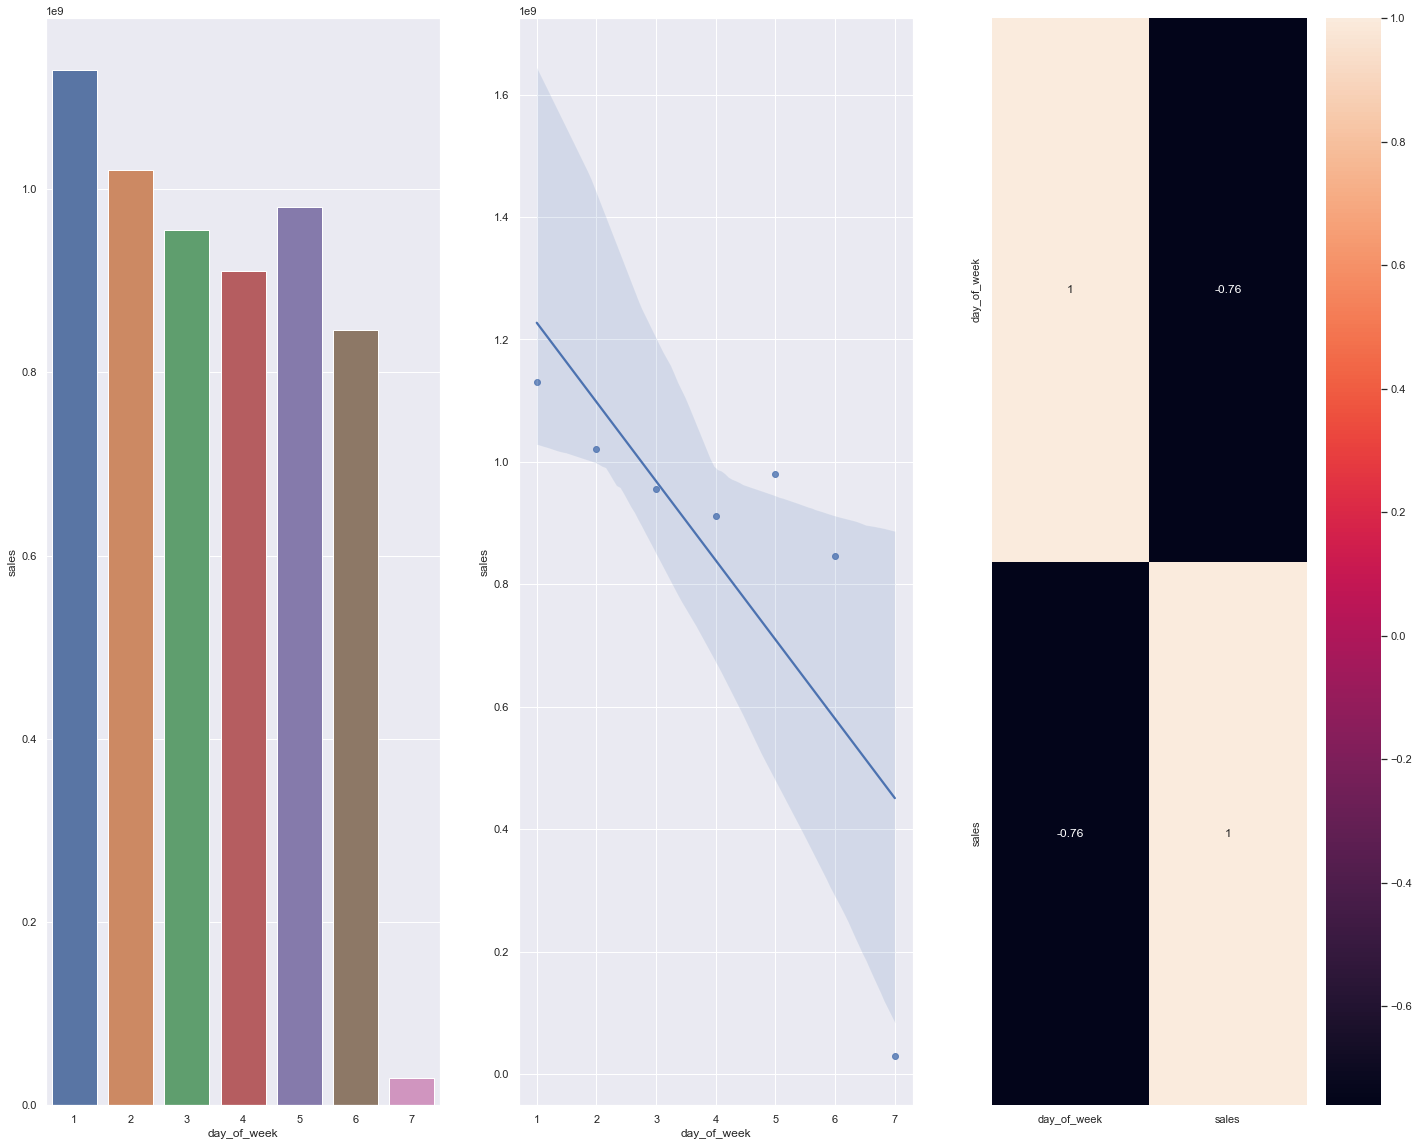

In [303]:
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='day_of_week', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

## **H3**. Lojas deveriam vender mais ao longo dos anos.
**FALSA** Lojas vendem menos ao longo dos anos.

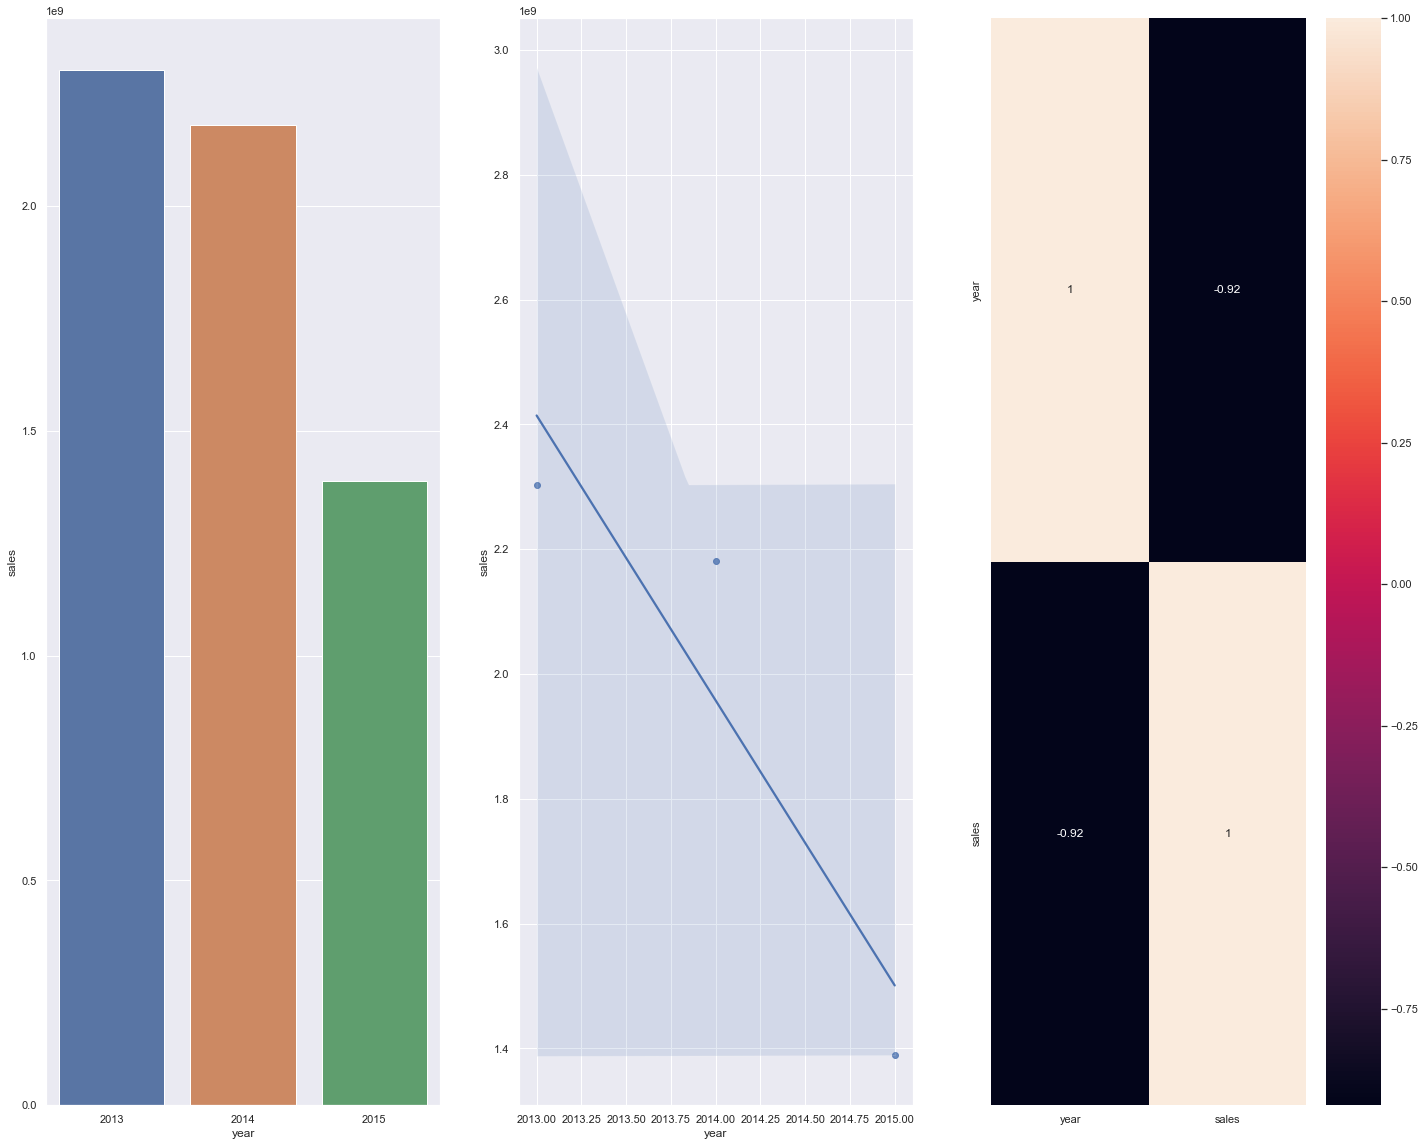

In [304]:
aux1 = df4[['year', 'sales']].groupby( 'year' ).sum().reset_index() 

plt.subplot( 1, 3, 1 )
sns.barplot( x='year', y='sales', data=aux1 ); 

plt.subplot( 1, 3, 2 )
sns.regplot( x='year', y='sales', data=aux1 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **H4**. Lojas com maior sortimento deveriam vender mais.
**FALSA** Lojas com maior sortimento vendem menos.

<AxesSubplot:xlabel='year_week'>

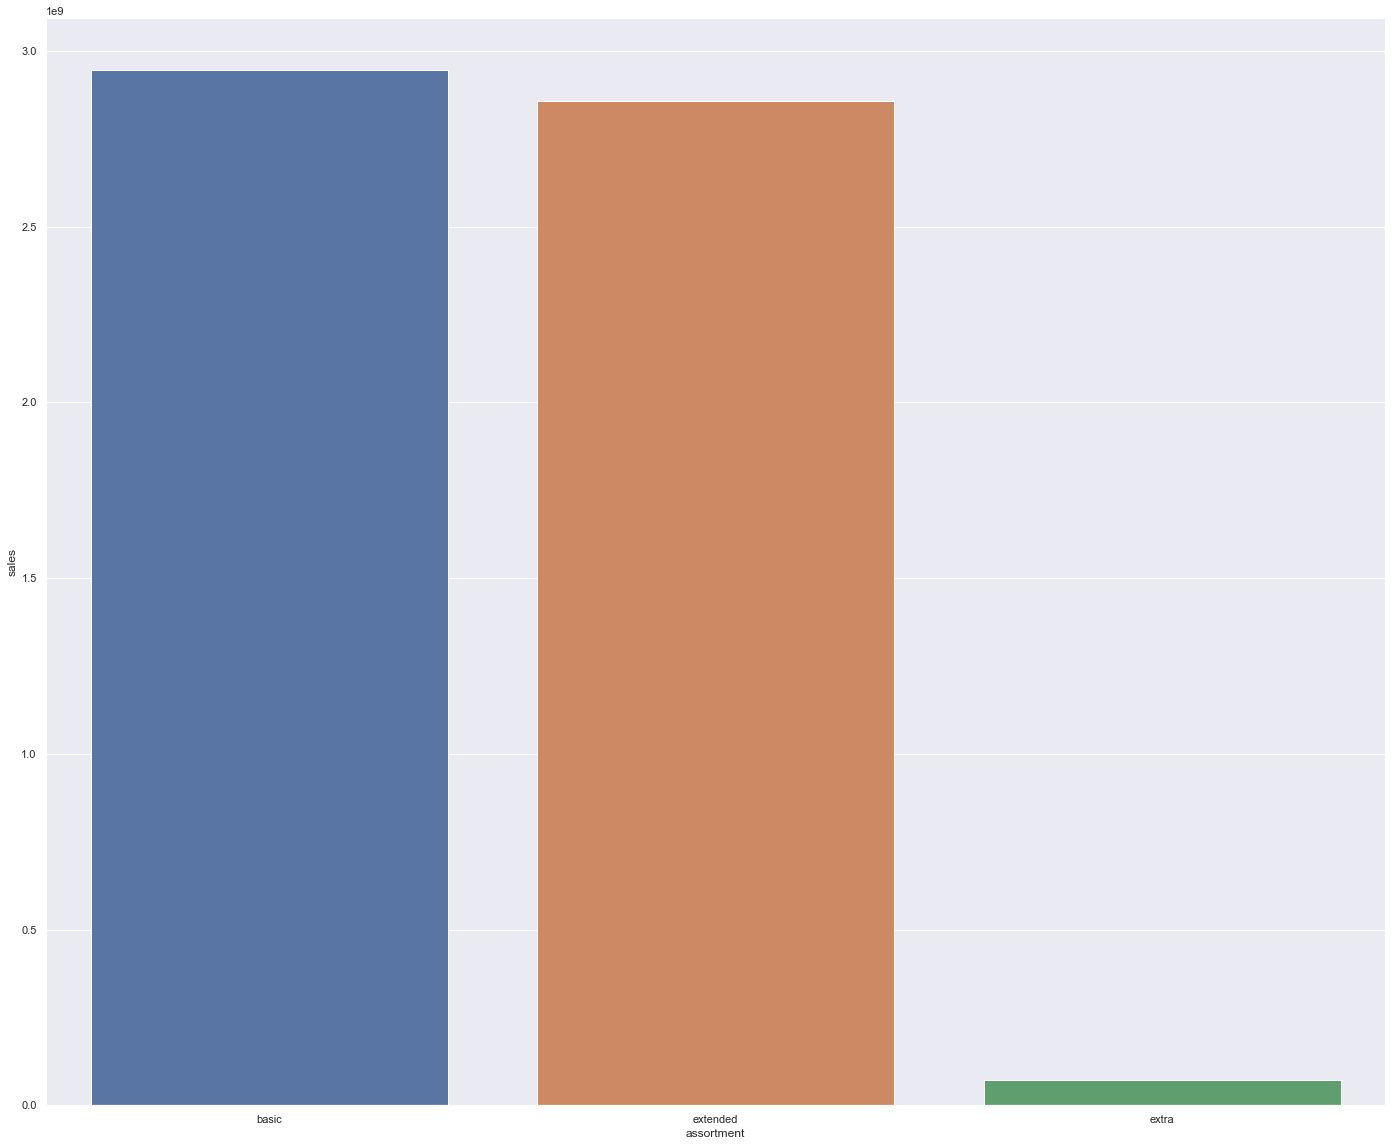

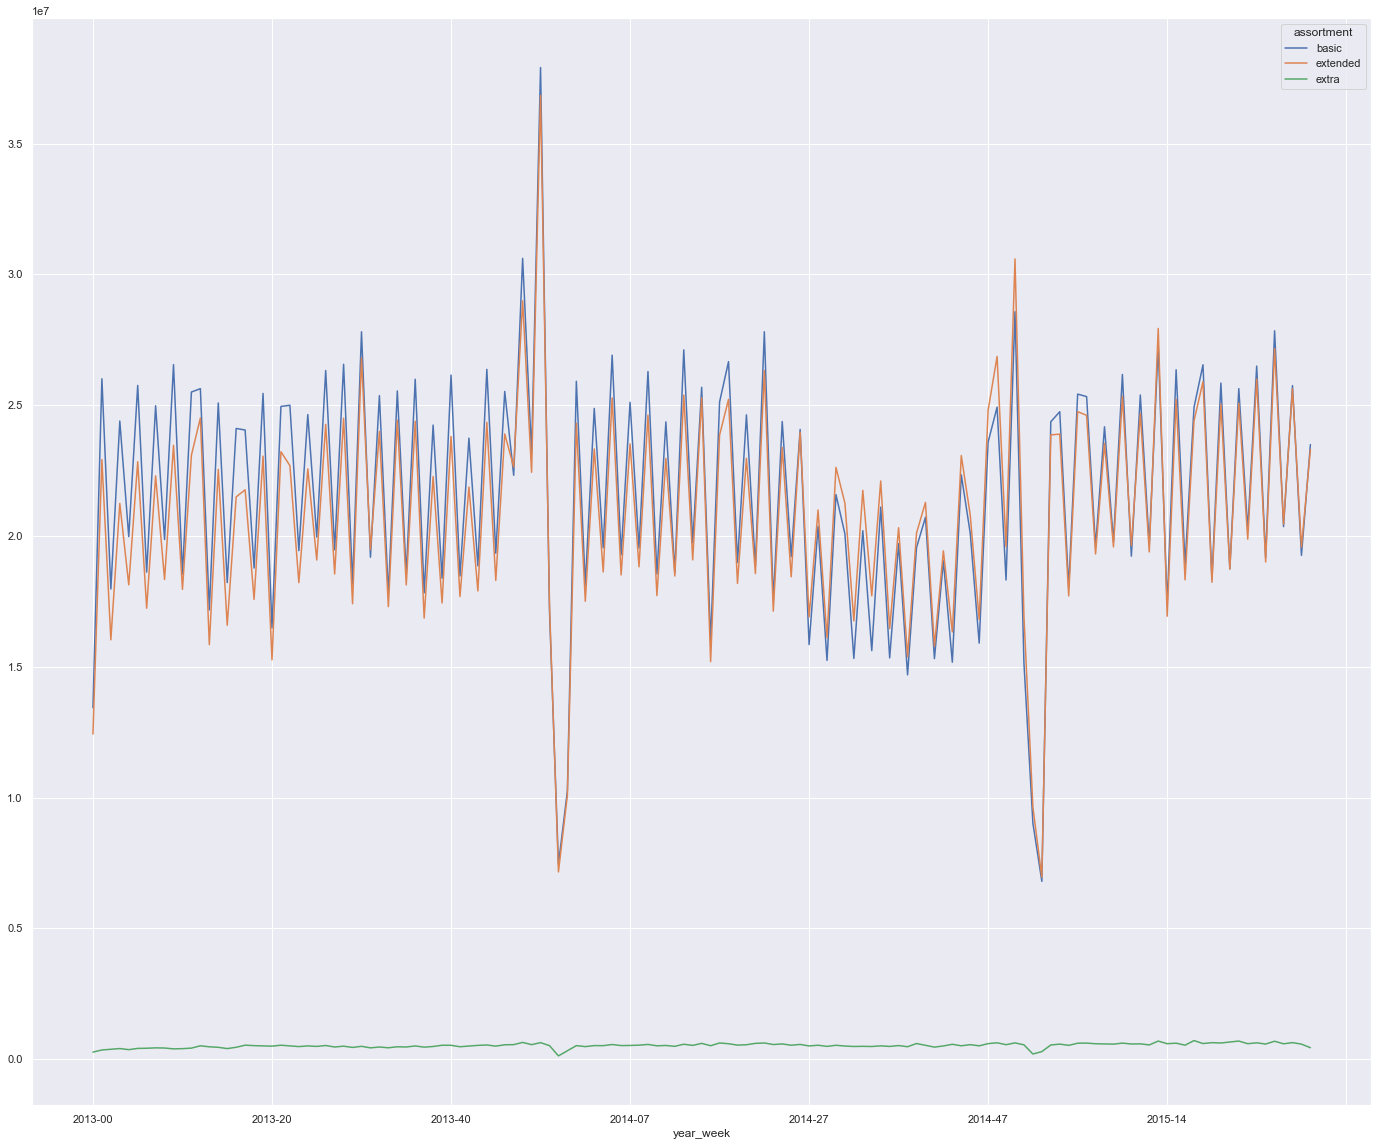

In [305]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1)

aux2 = df4[['year_week', 'assortment',
            'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

## **H5**. Lojas com competidores próximos deveriam vender menos.
**FALSA** Lojas com competidores próximo vendem mais.

<AxesSubplot:>

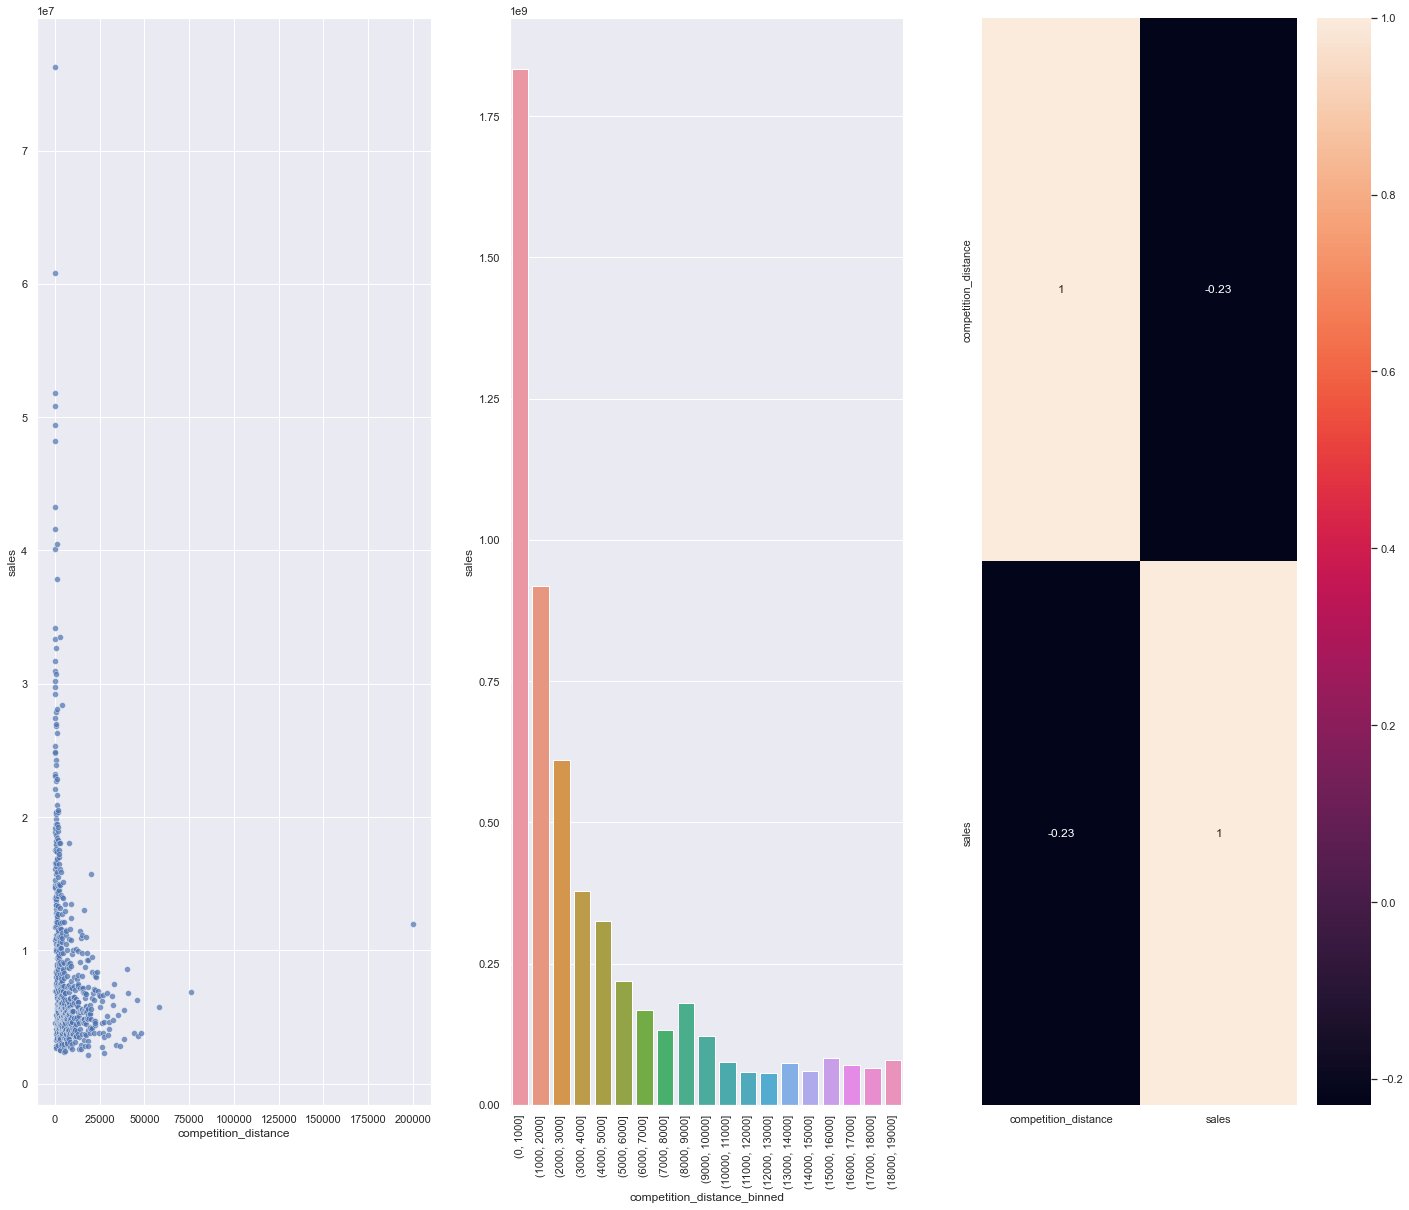

In [306]:
aux1 = df4[['competition_distance', 'sales']].groupby(['competition_distance']).sum().reset_index()

plt.subplot(1, 3, 1)
sns.scatterplot(
    x='competition_distance',
    y='sales',
    data=aux1,
    alpha=0.7,
)
# plt.xscale('log')

plt.subplot(1, 3, 2)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'],
                                             bins=bins)

aux2 = aux1[['competition_distance_binned', 'sales'
             ]].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x='competition_distance_binned', y='sales', data=aux2)
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True)

## **H6**. Lojas com competidores maduros deveriam vender mais.
**FALSA** Lojas com competidores maduros vendem menos.

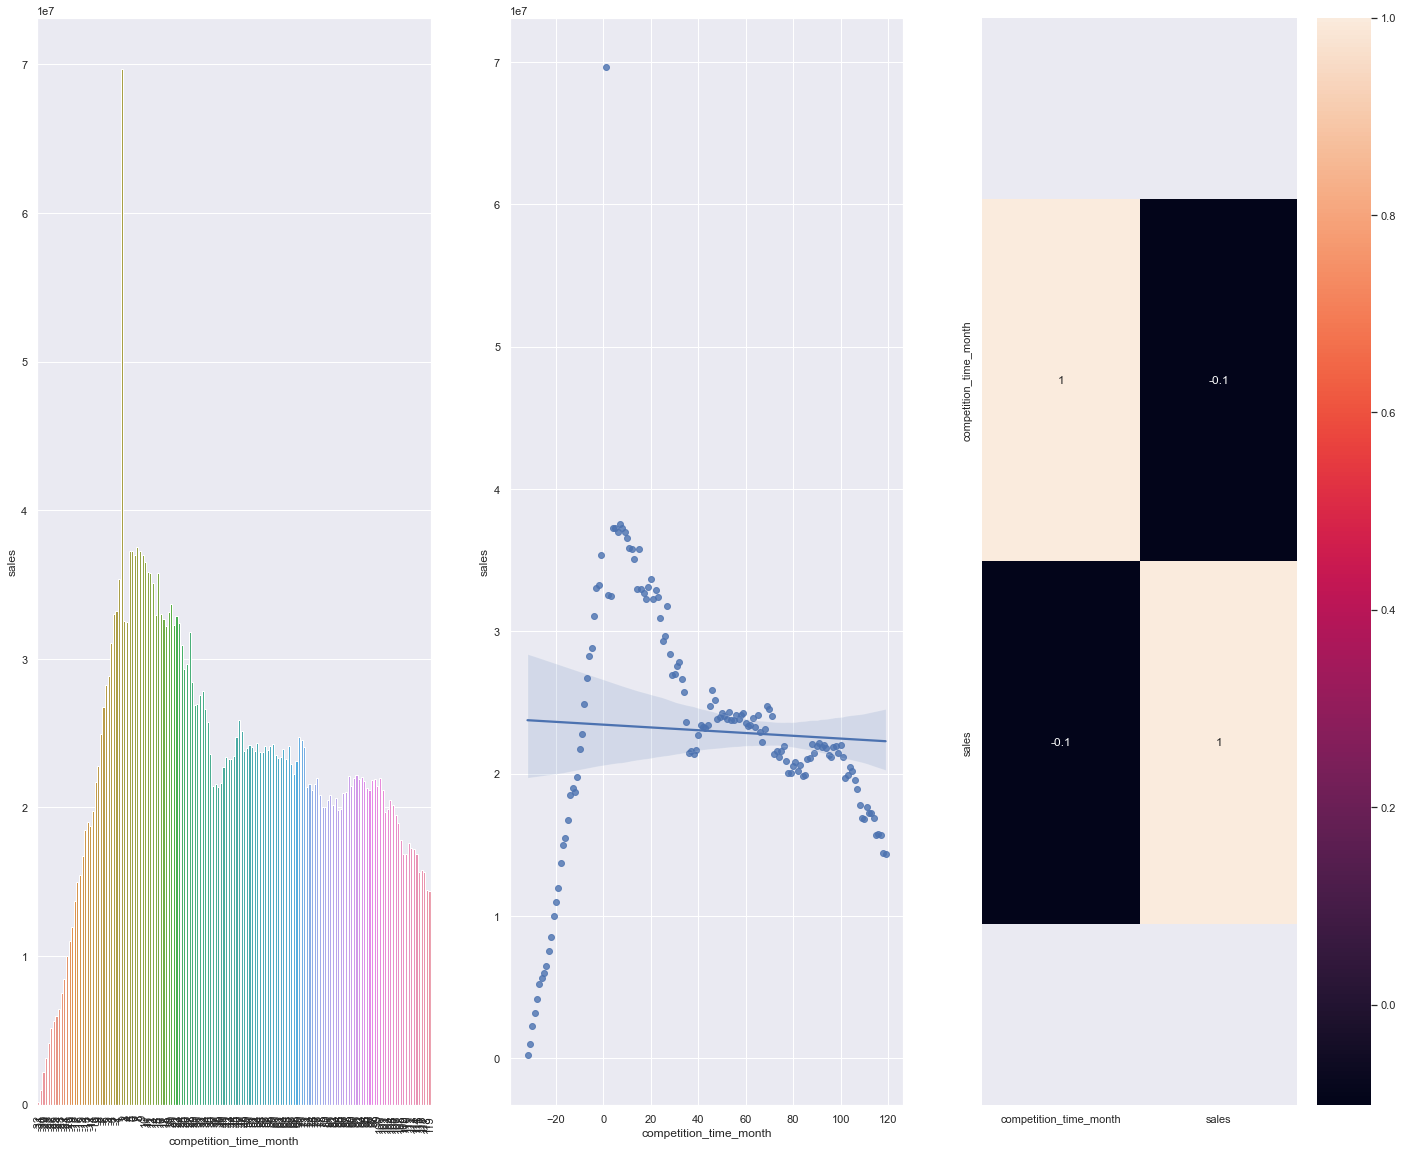

In [307]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month' ).sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & (aux1['competition_time_month'] != 0 )]
sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 ); 

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson'), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5);

## 4.2.2 Resumo das Hipóteses

In [385]:
from tabulate import tabulate

tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', 'Verdadeira', 'Alta'],
['H2', 'Verdadeira ', 'Alta'],
['H3', 'Falsa', 'Alta'],
['H4', 'Falsa', 'Baixa'],
['H5', 'Falsa', 'Alta'],
['H6', 'Falsa', 'Baixa'],
['H7', 'Verdadeira', 'Baixa'],
['H8', 'Verdadeira', 'Baixa'],
['H9', 'Falsa', 'Baixa'],
['H10', 'Verdadeira', 'Alta'],
]
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Verdadeira   Alta
H2           Verdadeira   Alta
H3           Falsa        Alta
H4           Falsa        Baixa
H5           Falsa        Alta
H6           Falsa        Baixa
H7           Verdadeira   Baixa
H8           Verdadeira   Baixa
H9           Falsa        Baixa
H10          Verdadeira   Alta


# 4.3 Análise Multivariada

# Atributos Númericos

<AxesSubplot:>

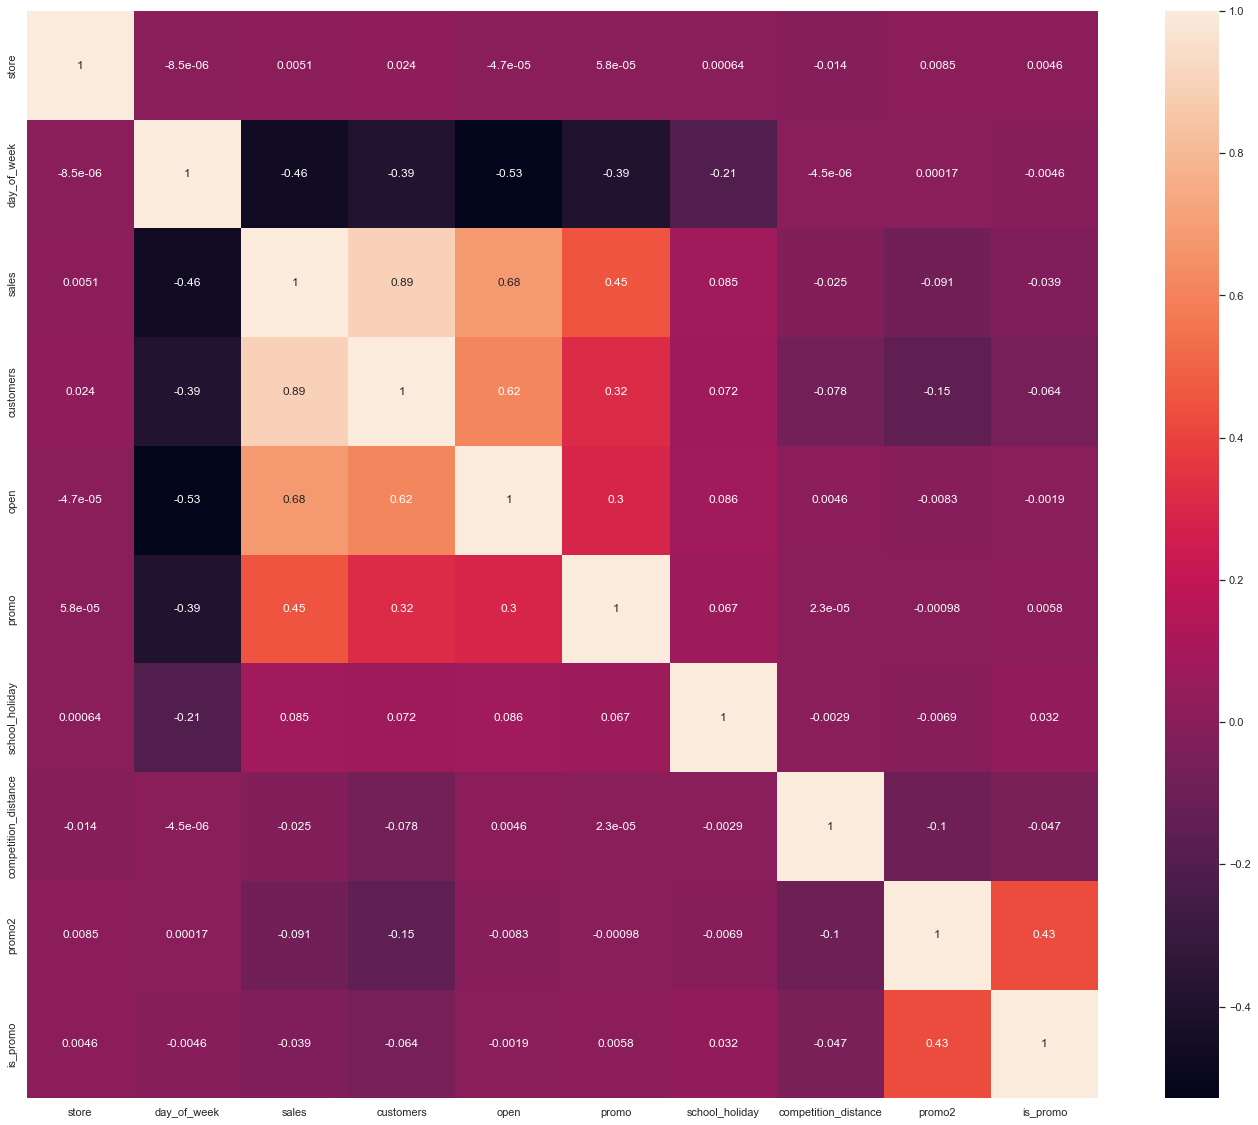

In [309]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True)

#  Atributos Categóricos

<AxesSubplot:>

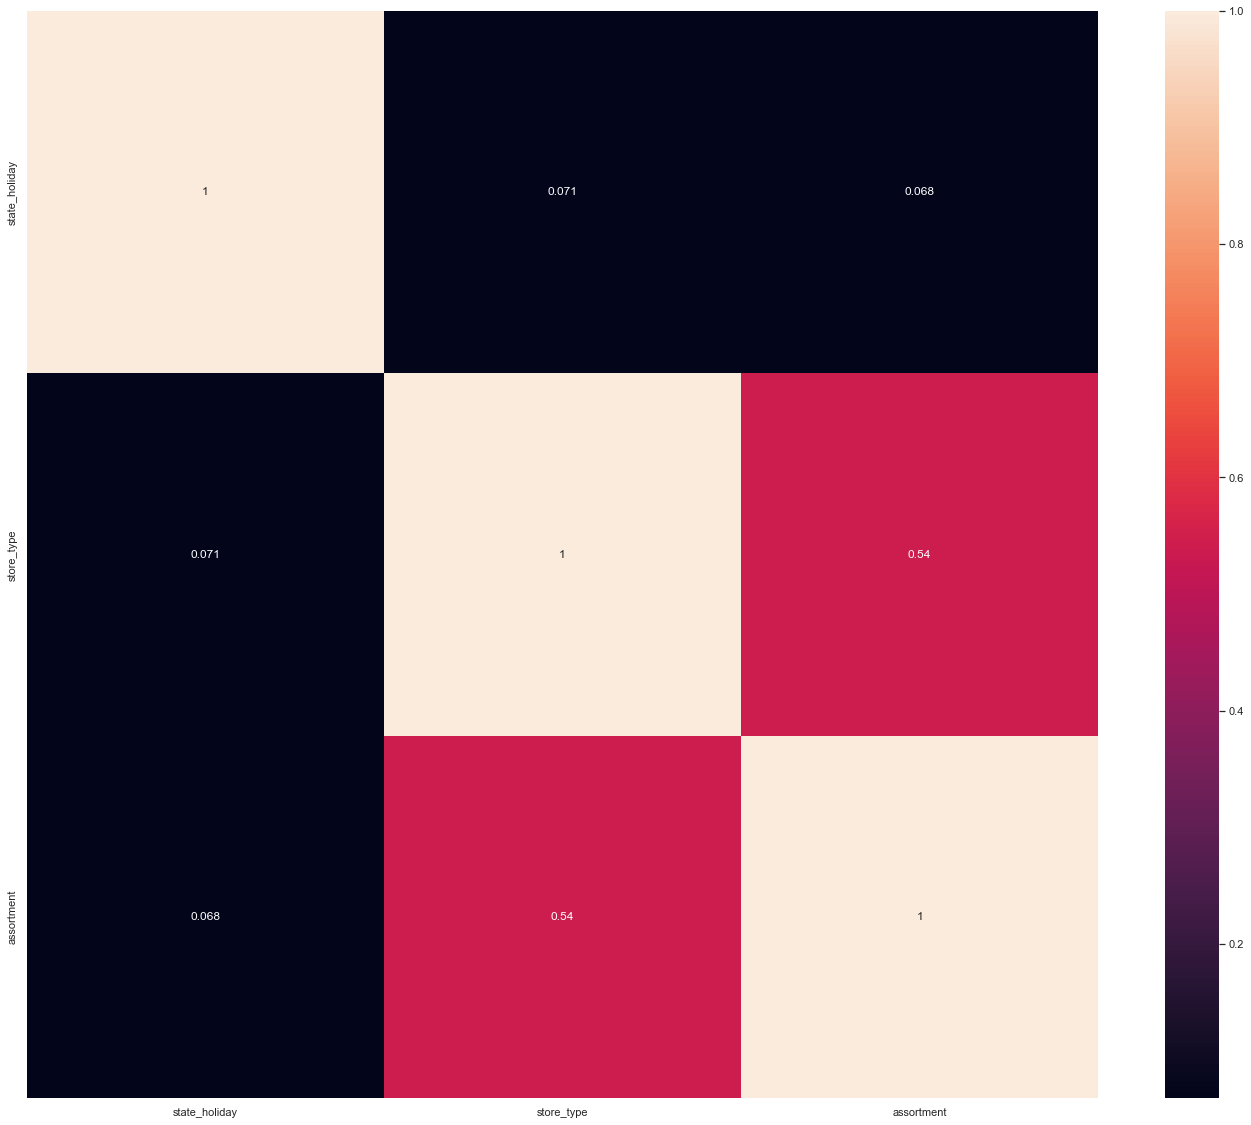

In [315]:
# only categorical data
a = df4.select_dtypes( include='object' ) 

# Calculate cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] ) 
a2 = cramer_v( a['state_holiday'], a['store_type'] ) 
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] ) 
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3], 'store_type': [a4, a5, a6], 'assortment': [a7, a8, a9] })
d = d.set_index( d.columns )
sns.heatmap( d, annot=True )

# MACHINE LEARNING MODELLING

# Comparando a Perfomance dos Modelos

In [71]:
modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, xgb_result_cv] )
modelling_result.sort_values( 'RMSE' )

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,1027.801303,0.157887,1459.205472
0,Average Model,1354.800353,0.413001,1835.135542
0,Linear Regression,1909.742755,0.304188,2705.624631
0,Linear Regression - Lasso,1909.470249,0.291887,2767.956947


# <font color='blue'> 4.0 Conclusão </font>

# TRADUÇÃO E INTERPRETAÇÃO DO ERRO

## Business Performance

In [82]:
df92.sort_values( 'MAPE', ascending=False ).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,110631.390625,106983.802580,114278.978670,3647.588045,0.654391
875,876,192063.781250,186963.504203,197164.058297,5100.277047,0.494741
908,909,238008.671875,230744.228622,245273.115128,7264.443253,0.482808
482,483,190316.421875,189170.989377,191461.854373,1145.432498,0.397498
197,198,110764.734375,110035.227862,111494.240888,729.506513,0.396977


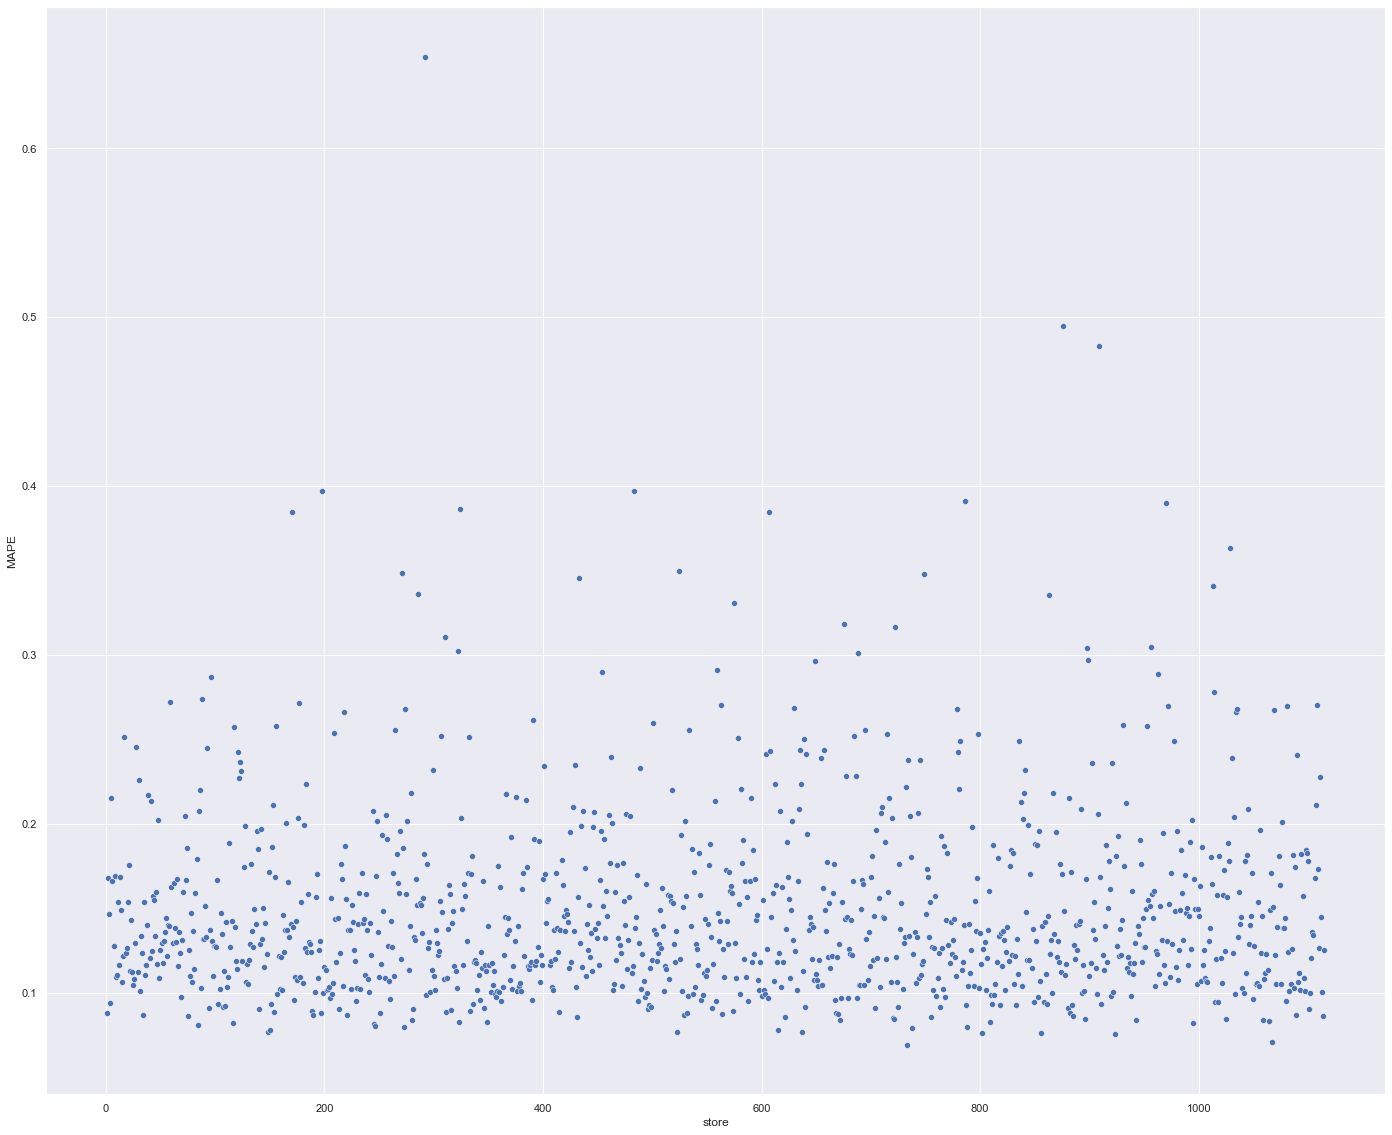

In [83]:
sns.scatterplot( x='store', y='MAPE', data=df92 )

# Total Performance

In [84]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index': 'Scenario', 0:'Values'} )
df93['Values'] = df93['Values'].map( 'R${:,.2f}'.format )
df93

,Scenario,Values
0,predictions,"R$290,642,432.00"
1,worst_scenario,"R$289,574,532.63"
2,best_scenario,"R$291,710,334.14"


#  Machine Learning Performance

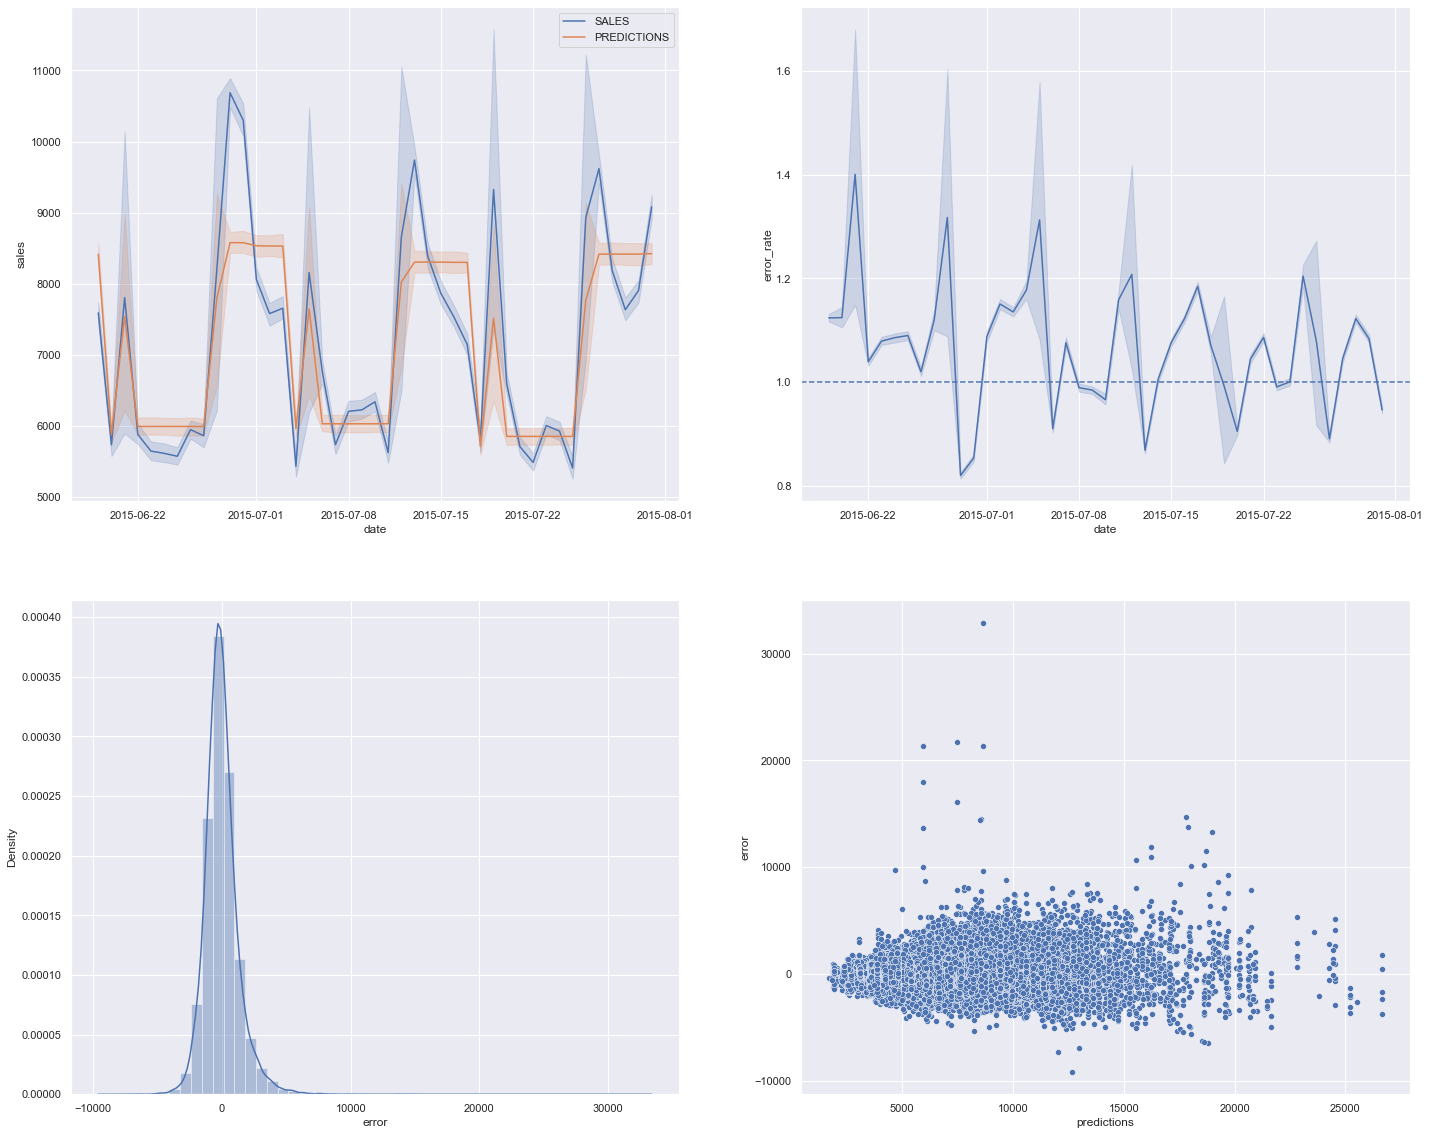

In [86]:
plt.subplot( 2, 2, 1 )
sns.lineplot( x='date', y='sales', data=df9, label='SALES' )
sns.lineplot( x='date', y='predictions', data=df9, label='PREDICTIONS' )

plt.subplot( 2, 2, 2 )
sns.lineplot( x='date', y='error_rate', data=df9 )
plt.axhline( 1, linestyle='--')

plt.subplot( 2, 2, 3 )
sns.distplot( df9['error'] )

plt.subplot( 2, 2, 4 )
sns.scatterplot( df9['predictions'], df9['error'] )

# <font color='blue'> 5.0 Próximos Passos </font>

- Melhorar a Acurácia do Modelo em 5%
- Deploy do Modelo para Produção
- Workshop do Modelo para pessoas Business Users
- Coletar feedbacks da Usabilidade do Modelo

# Q&A

# <font color='blue'><center> Muito Obrigado!</font>